## Notebook to combine the demultiplexed per pool per lane anndata objects into a single anndata

this is just to combine them not correct, see combat (old/simple), MNN, and BBKNN for that

In [1]:
!date

Mon Jul 19 00:23:36 EDT 2021


#### import libraries and set notebook variables

In [40]:
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# naming
cohort = 'aging'
pool_names = []
for pnum in range(1, 7):
    for lane in range(1, 9):
        pool_names.append(f'Aging_P00{pnum}_SCRN_{lane}')

# directories
home_dir = '/labshare/raph/datasets/adrd_neuro'
wrk_dir = f'{home_dir}/{cohort}'
results_dir = f'{wrk_dir}/demux'

# in files
path_to_h5ad = '{this_dir}/{this_name}.h5ad'

# out files
output_file = f'{results_dir}/{cohort}.h5ad'

#### combine the individual anndatas into single large anndata

In [38]:
%%time
adata_list = []
for pool_name in pool_names:
    this_h5ad = path_to_h5ad.format(this_dir=results_dir, this_name=pool_name)
    this_adata = sc.read_h5ad(this_h5ad)
#     print(this_adata)
    adata_list.append(this_adata)

all_adata = ad.concat(adata_list)
all_adata.obs_names_make_unique()
print(all_adata)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 168090 × 36601
    obs: 'pool_name', 'Sample_id', 'Tissue_source', 'Brain_region', 'Clinical_diagnosis', 'Age', 'Sex', 'donor_id', 'lane_num'


#### save the combined anndata object

In [39]:
all_adata.write(output_file)

... storing 'pool_name' as categorical
... storing 'Sample_id' as categorical
... storing 'Brain_region' as categorical
... storing 'donor_id' as categorical
... storing 'lane_num' as categorical


#### visualization functions

In [50]:
# function to plot the barcode counts by sample
def plot_sample_barcode_counts(this_df, sample_name, id_col='Sample_id'):
    plt.figure(figsize=(9, 7))
    sns.set_theme(style="whitegrid")
    sns.barplot(x=this_df[id_col].value_counts().index, 
                y=this_df[id_col].value_counts().values, 
                order=this_df[id_col].value_counts().index, palette='Blues_d')
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.title(f'Counts by {id_col}')
    plt.ylabel('barcode counts')
    print(this_df[id_col].value_counts())

#### visualize the counts by sample

Aging097    11636
Aging096     9785
Aging082     7878
Aging108     7626
Aging110     7494
Aging081     7445
Aging114     6725
Aging074     6106
Aging109     5197
Aging092     4759
Aging104     4750
Aging112     4596
Aging090     4193
Aging106     3918
Aging070     3776
Aging098     3444
Aging107     3221
Aging095     3215
Aging073     3032
Aging077     3016
Aging086     2917
Aging105     2798
Aging116     2792
Aging103     2776
Aging099     2690
Aging083     2649
Aging071     2607
Aging085     2419
Aging080     2387
Aging084     2201
Aging094     2199
Aging075     2179
Aging101     2089
Aging069     2007
Aging088     1875
Aging117     1861
Aging091     1785
Aging102     1772
Aging089     1756
Aging100     1697
Aging072     1655
Aging113     1652
Aging118     1528
Aging111     1393
Aging076     1344
Aging079     1275
Aging115     1258
Aging078      717
Name: Sample_id, dtype: int64


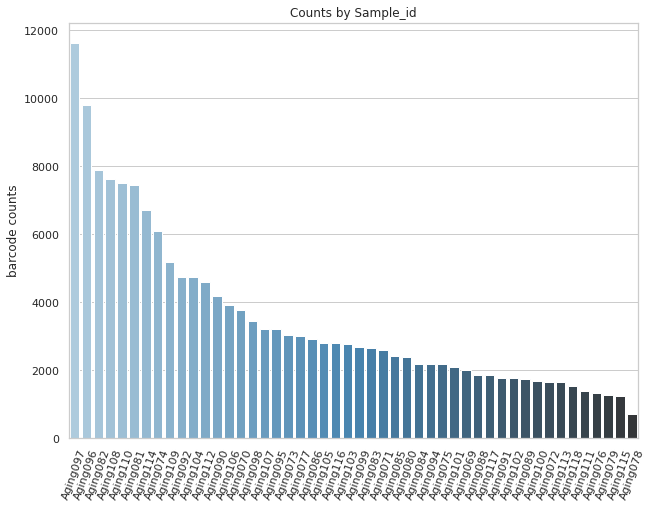

In [51]:
plot_sample_barcode_counts(all_adata.obs, pool_name)

NHBCC-1604    28080
NHBCC-1669    23538
NHBCC-1187    20359
NHBCC-2628    14366
NHBCC-1615    14242
NHBCC-1119    11317
NHBCC-831     10045
NHBCC-1340     9609
NHBCC-1613     8248
NHBCC-1275     7537
NHBCC-2790     7439
NHBCC-1556     6958
NHBCC-1137     6352
Name: donor_id, dtype: int64


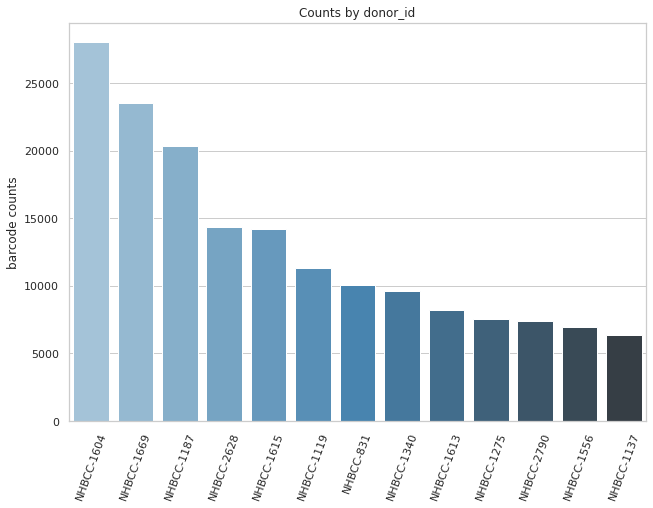

In [52]:
plot_sample_barcode_counts(all_adata.obs, pool_name, 'donor_id')

P004    41431
P003    40505
P005    30645
P001    19375
P006    18964
P002    17170
Name: pool_name, dtype: int64


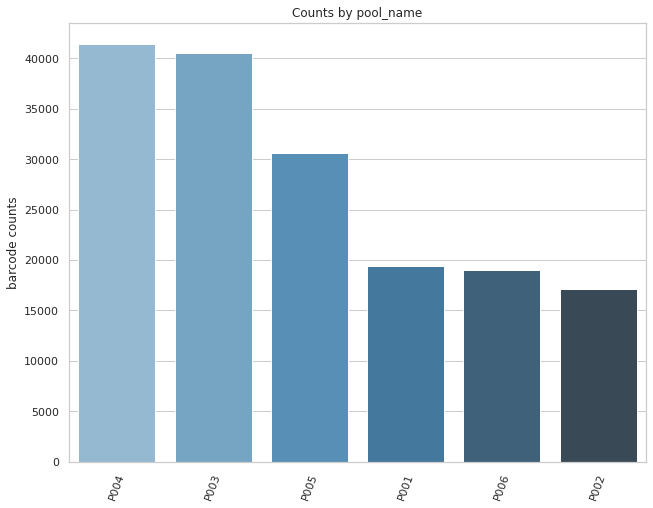

In [53]:
plot_sample_barcode_counts(all_adata.obs, pool_name, 'pool_name')

Entorhinal cortex        54417
Putamen                  49651
Subventricular zone      36623
Middle temporal gyrus    27399
Name: Brain_region, dtype: int64


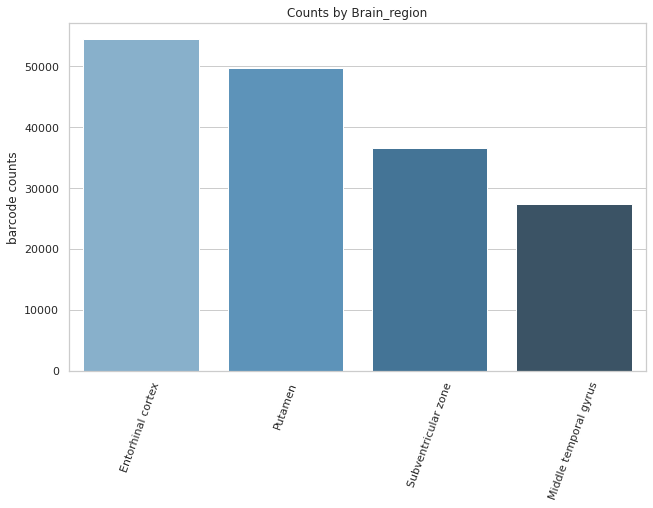

In [54]:
plot_sample_barcode_counts(all_adata.obs, pool_name, 'Brain_region')